In [15]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
import json

fontSize = 15 

# ===================== Plot of graphs for results of the first gan gs experiment =====================

In [2]:
json_file = open('outputs/gan_experiments_output.json')

gan_experiments = json.load(json_file)
print(gan_experiments.keys())

dict_keys(['description', 'val_recursive_1hour_models_15epochs', 'val_epoch_loss', 'disc_epoch_loss', 'gen_epoch_loss', 'best_val_loss_and_epoch'])


In [3]:
# values for best_unet recursive and cmv on mae up to 1 hour
best_unet = [0.05803579, 0.07733818, 0.09227042, 0.10242441, 0.11052191, 0.11825367]
cmv = [0.06407604, 0.08347717, 0.09616664, 0.10551146, 0.11290251, 0.119154]

## PLOT NO1: recursive validation up to 1 hour on MAE on models trained 15 epochs

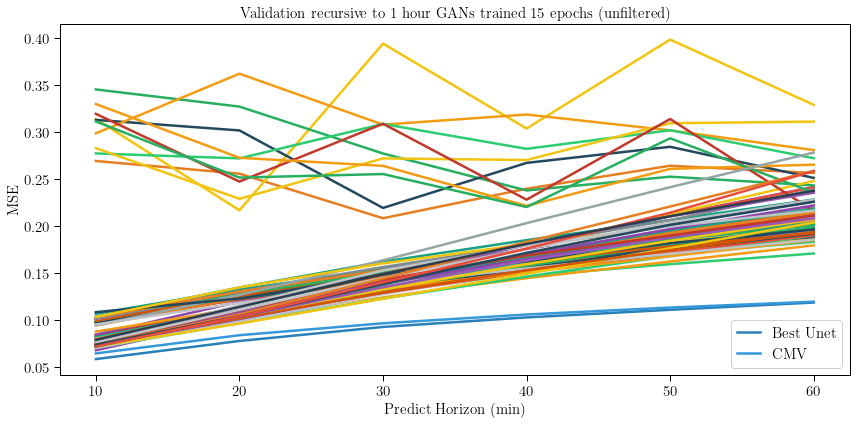

In [12]:
outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# 1.1) Plot all values witout filtering

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

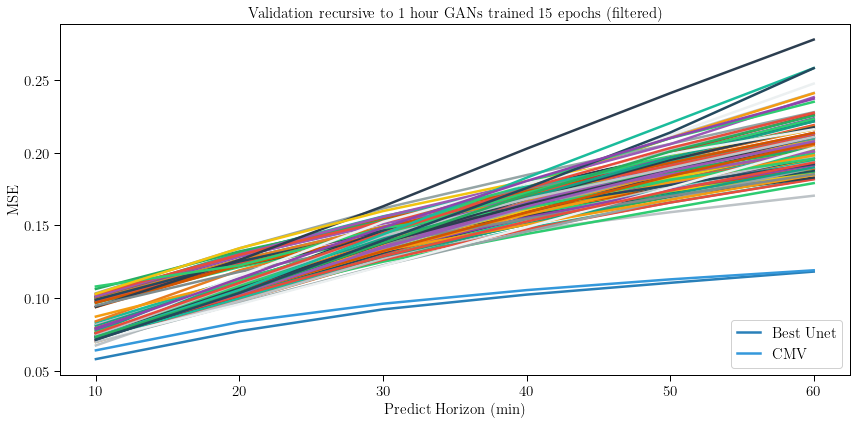

In [14]:
# 1.2) Plot all values filtering

outlier_exps = []
for k in outputs.keys():
    if outputs[k][0] > 0.25:
        outlier_exps.append(k)

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

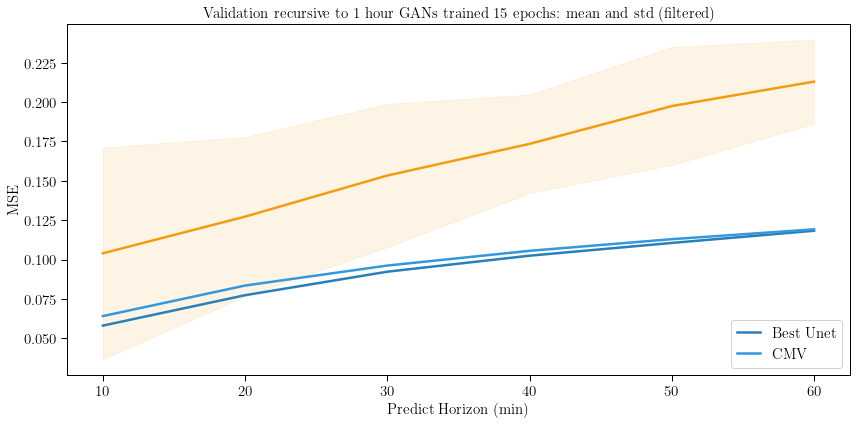

In [17]:
# 1.3) Plot mean and std for all models (filtered)

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs: mean and std (filtered)', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
stacked_outputs = []
for k in outputs.keys():
    if outputs[k] not in outlier_exps:
        stacked_outputs.append(outputs[k])

stacked_outputs = np.array(stacked_outputs)

mean = np.mean(stacked_outputs, axis=0)
std = np.std(stacked_outputs, axis=0)

ax.plot(range(10, 70, 10), mean, color=Colors.orange, linewidth=2.5)
plt.fill_between(range(10, 70, 10), mean - std, mean + std, color=Colors.orange, alpha=.1)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()